<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dask-Documentation" data-toc-modified-id="Dask-Documentation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dask Documentation</a></span></li><li><span><a href="#Dask-Example-on-merlin6" data-toc-modified-id="Dask-Example-on-merlin6-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dask Example on merlin6</a></span><ul class="toc-item"><li><span><a href="#Creating-a-dask-cluster" data-toc-modified-id="Creating-a-dask-cluster-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Creating a dask cluster</a></span></li><li><span><a href="#Attaching-a-client-and-connecting-to-the-dask-dashboard" data-toc-modified-id="Attaching-a-client-and-connecting-to-the-dask-dashboard-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Attaching a client and connecting to the dask dashboard</a></span></li><li><span><a href="#Working-with-a-dask-dataframe" data-toc-modified-id="Working-with-a-dask-dataframe-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Working with a dask dataframe</a></span></li><li><span><a href="#Functionality-that-is-not-working" data-toc-modified-id="Functionality-that-is-not-working-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Functionality that is not working</a></span></li><li><span><a href="#Closing-the-client-connection-and-shutting-down-the-cluster" data-toc-modified-id="Closing-the-client-connection-and-shutting-down-the-cluster-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Closing the client connection and shutting down the cluster</a></span></li></ul></li></ul></div>

# Dask Documentation

   * https://dask.org/
   * https://github.com/dask/dask-tutorial

# Dask Example on merlin6

Python environment that we are running under

In [1]:
! conda info -e

# conda environments:
#
                         /data/user/feichtinger/conda-envs/my-test-env1
base                     /opt/psi/Programming/anaconda/2019.07/conda
dask-test                /opt/psi/Programming/anaconda/2019.07/conda/envs/dask-test
datascience_py36         /opt/psi/Programming/anaconda/2019.07/conda/envs/datascience_py36
datascience_py37      *  /opt/psi/Programming/anaconda/2019.07/conda/envs/datascience_py37
focus                    /opt/psi/Programming/anaconda/2019.07/conda/envs/focus
hpce-tools               /opt/psi/Programming/anaconda/2019.07/conda/envs/hpce-tools
jupyterhub-1.0.0_py36     /opt/psi/Programming/anaconda/2019.07/conda/envs/jupyterhub-1.0.0_py36
jupyterhub_dev_py36      /opt/psi/Programming/anaconda/2019.07/conda/envs/jupyterhub_dev_py36
mpi-test                 /opt/psi/Programming/anaconda/2019.07/conda/envs/mpi-test
talos_py36               /opt/psi/Programming/anaconda/2019.07/conda/envs/talos_py36
tensorflow-1.13.1_py36     /opt/psi/Programmi

## Creating a dask cluster

In [2]:
from dask_jobqueue import SLURMCluster

Note that we define the fast infiniband network `ib0` for the `interfacce` parameter. For a first functional test you may use the `eno1` ethernet network, but never for high throuput production. 

In [3]:
cluster = SLURMCluster(queue="hourly", processes=6, cores=24, memory="10GB",
                      interface="ib0")

The scale command launches the jobs for the worker nodes

In [4]:
cluster.scale(2)

You can check in your terminal whether the worker job has been submitted and is running

In [5]:
!squeue -u $USER

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
         134909471    hourly dask-wor feichtin  R       0:32      1 merlin-c-013
         134908606   general spawner- feichtin  R      50:27      1 merlin-c-017


## Attaching a client and connecting to the dask dashboard

In [6]:
from dask.distributed import Client

In [7]:
client = Client(cluster)

client

<Client: scheduler='tcp://192.168.196.37:38610' processes=6 cores=24>

Note that the dashboard address shown is on the Ib network that is private to the cluster. In order to reach the private network address of the dashboard with your browser, you can use SSH-tunneling or sshuttle, e.g.

```
sshuttle -v -r merlin-l-001 192.168.196.00/24
```

You need to have **sudo** permissions on your machine in order to run sshuttle.

## Working with a dask dataframe

Creation of a dask dataframe by reading in a dataset. We are hosting the **nyflights** data set from the dask tutorial centrally

In [8]:
import dask.dataframe as dd
import os
df = dd.read_csv(os.path.join('/data/project/general/public/dask-tutorial/data', 'nycflights', '*.csv'),
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'TailNum': object,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})

In [9]:
df.head()

Date  DayOfWeek  DepTime  CRSDepTime  ArrTime  CRSArrTime  \
0 1990-01-01          1   1621.0        1540   1747.0        1701   
1 1990-01-02          2   1547.0        1540   1700.0        1701   
2 1990-01-03          3   1546.0        1540   1710.0        1701   
3 1990-01-04          4   1542.0        1540   1710.0        1701   
4 1990-01-05          5   1549.0        1540   1706.0        1701   

  UniqueCarrier  FlightNum TailNum  ActualElapsedTime  ...  AirTime  ArrDelay  \
0            US         33     NaN               86.0  ...      NaN      46.0   
1            US         33     NaN               73.0  ...      NaN      -1.0   
2            US         33     NaN               84.0  ...      NaN       9.0   
3            US         33     NaN               88.0  ...      NaN       9.0   
4            US         33     NaN               77.0  ...      NaN       5.0   

   DepDelay  Origin Dest Distance  TaxiIn  TaxiOut  Cancelled  Diverted  
0      41.0     EWR  PIT    319.0     NaN      NaN      False         0  
1       7.0     EWR  PIT    319.0     NaN      NaN      False         0  
2       6.0     EWR  PIT    319.0     NaN      NaN      False         0  
3       2.0     EWR  PIT    319.0     NaN      NaN      False         0  
4       9.0     EWR  PIT    319.0     NaN      NaN      False         0  

[5 rows x 21 columns]

Let's find the maximal departure delay time of all flights that were not cancelled

In [10]:
# Maximum non-cancelled delay
largest_delay = df[~df.Cancelled].DepDelay.max()
largest_delay

dd.Scalar<series-..., dtype=float64>

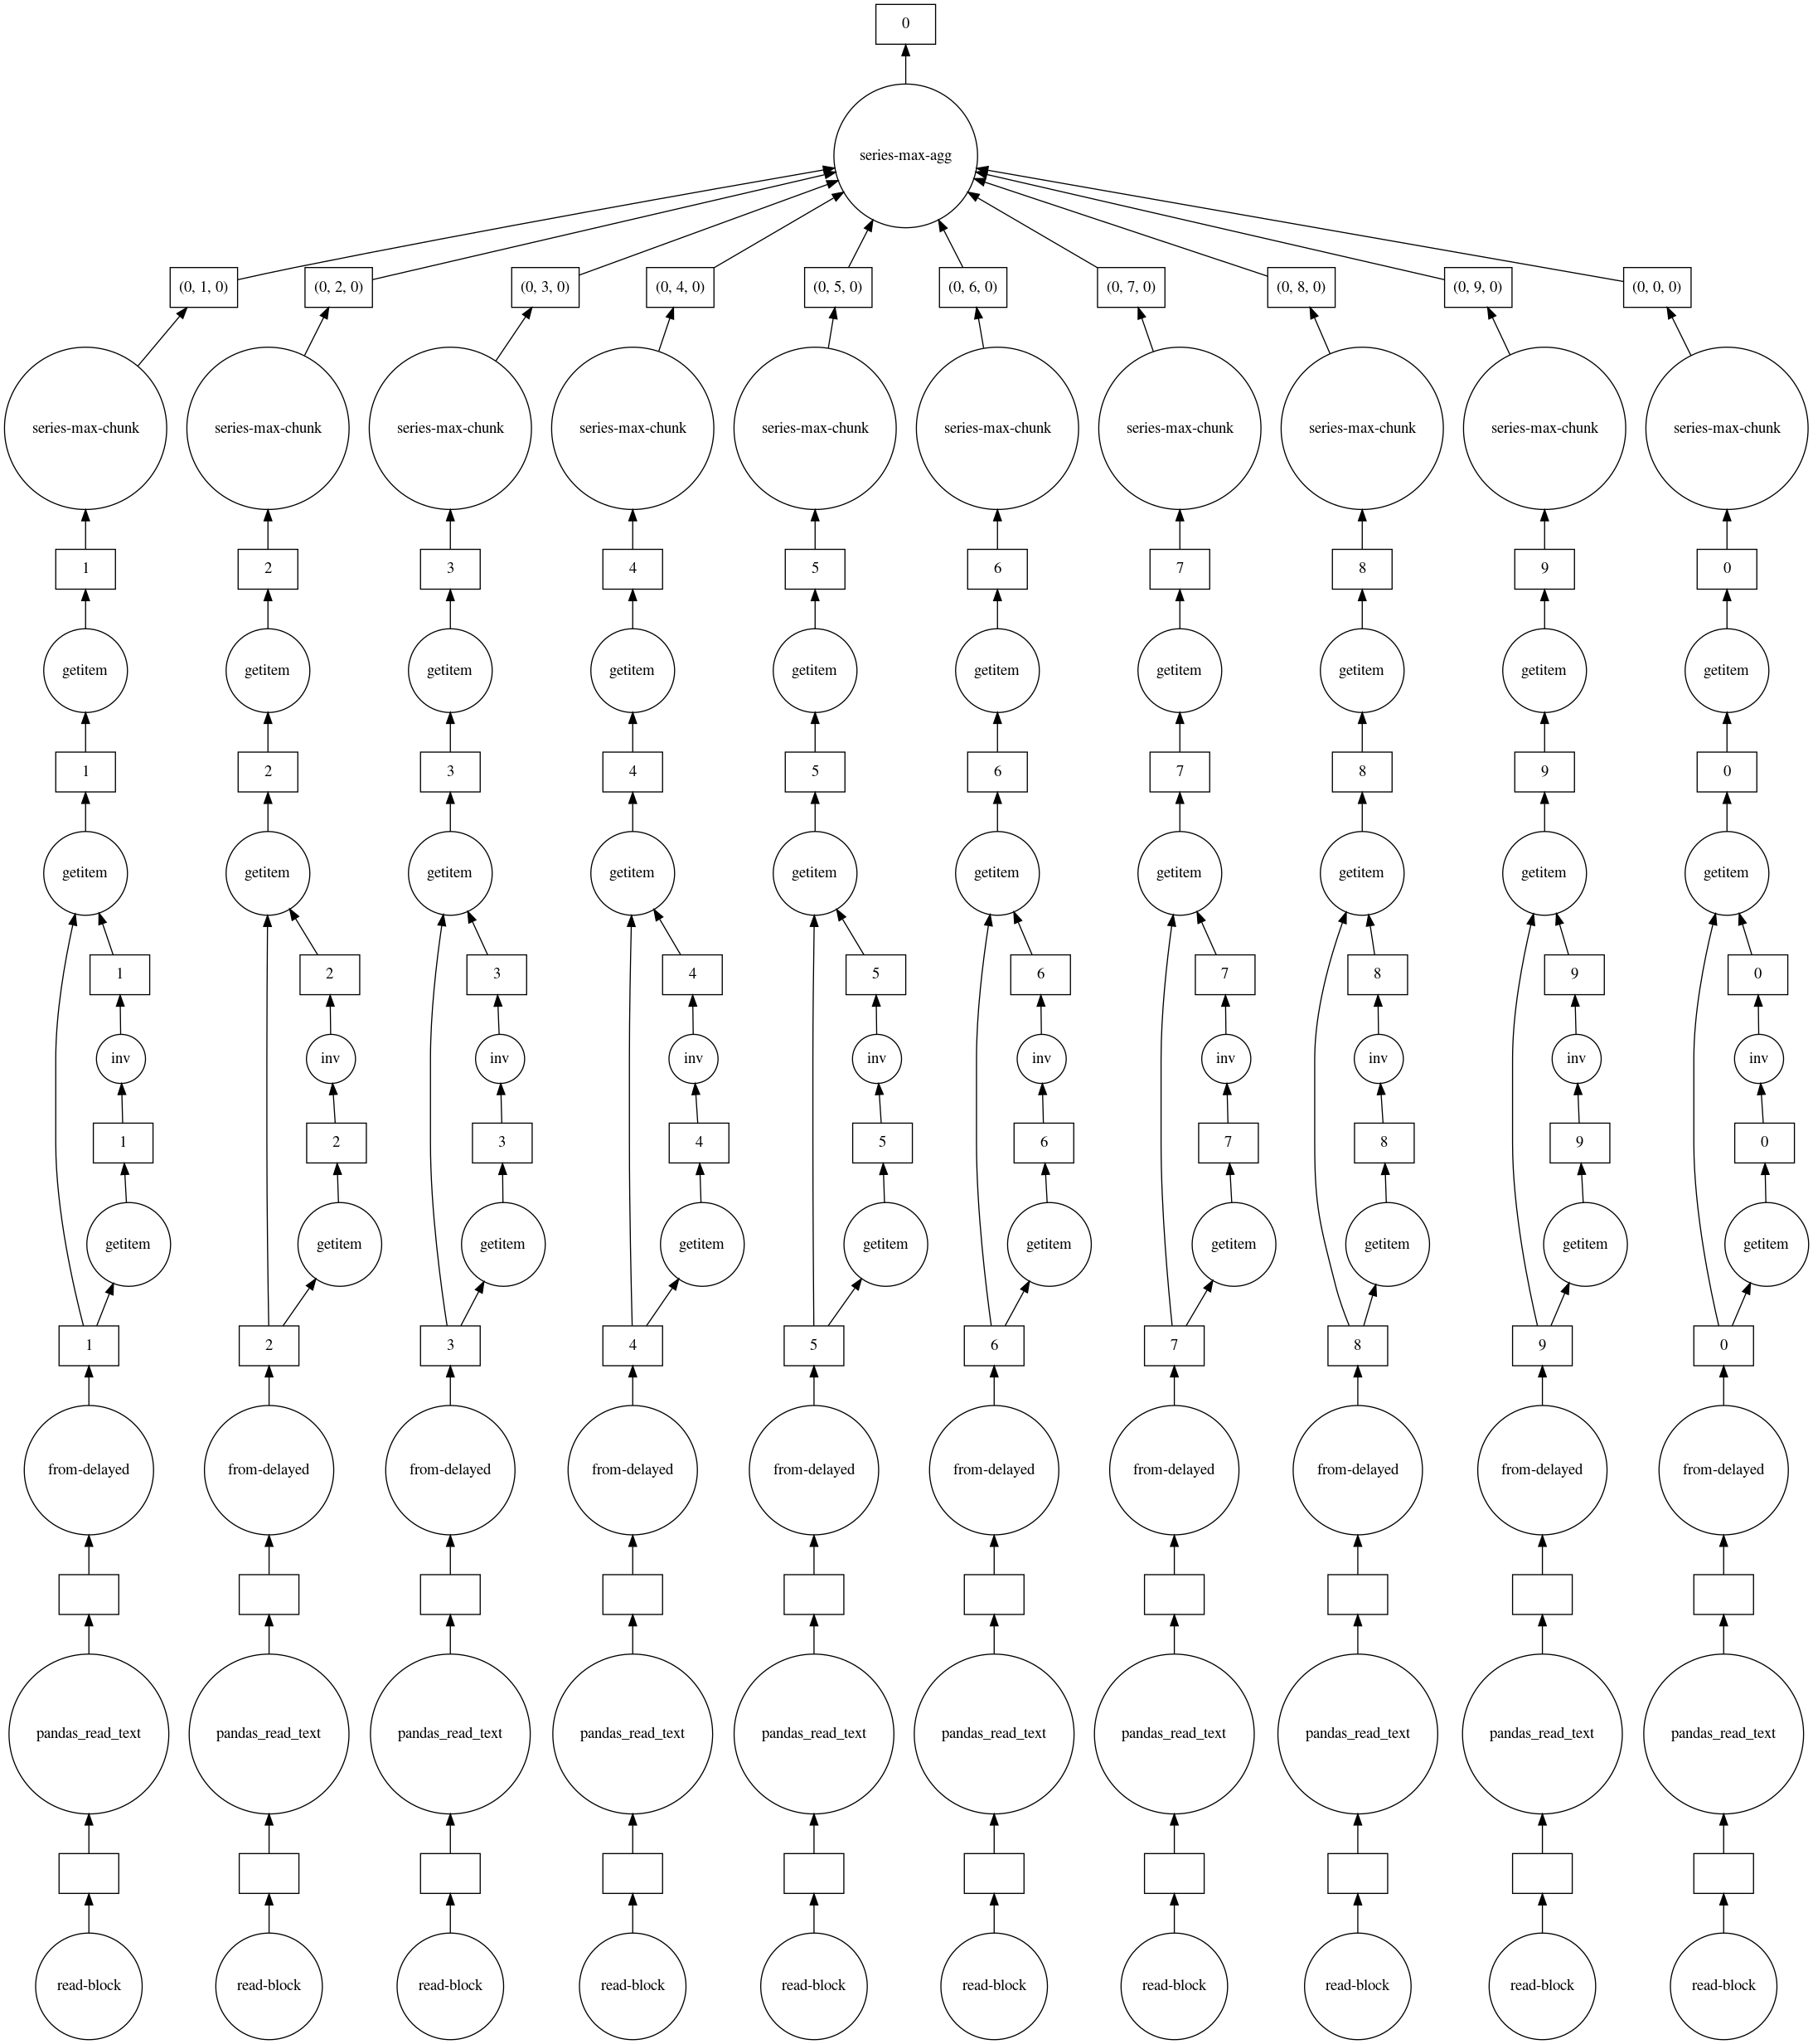

In [11]:
largest_delay.visualize()

In [12]:
largest_delay.compute()

1435.0

## Functionality that is not working

Starting ipython workers does not work, currently

In [15]:
client.start_ipython_workers()

distributed.core - ERROR - IPython didn't start in a reasonable amount of time.
Traceback (most recent call last):
  File "/opt/psi/Programming/anaconda/2019.07/conda/envs/datascience_py37/lib/python3.7/site-packages/distributed/core.py", line 416, in handle_comm
    result = await result
  File "/opt/psi/Programming/anaconda/2019.07/conda/envs/datascience_py37/lib/python3.7/site-packages/distributed/scheduler.py", line 2663, in broadcast
    [send_message(address) for address in addresses if address is not None]
  File "/opt/psi/Programming/anaconda/2019.07/conda/envs/datascience_py37/lib/python3.7/site-packages/distributed/utils.py", line 228, in All
    result = await tasks.next()
  File "/opt/psi/Programming/anaconda/2019.07/conda/envs/datascience_py37/lib/python3.7/site-packages/distributed/scheduler.py", line 2659, in send_message
    resp = await send_recv(comm, close=True, serializers=serializers, **msg)
  File "/opt/psi/Programming/anaconda/2019.07/conda/envs/datascience_py37/

Exception: IPython didn't start in a reasonable amount of time.

In [16]:
help(client.start_ipython_workers)

Help on method start_ipython_workers in module distributed.client:

start_ipython_workers(workers=None, magic_names=False, qtconsole=False, qtconsole_args=None) method of distributed.client.Client instance
    Start IPython kernels on workers
    
    Parameters
    ----------
    workers: list (optional)
        A list of worker addresses, defaults to all
    
    magic_names: str or list(str) (optional)
        If defined, register IPython magics with these names for
        executing code on the workers.  If string has asterix then expand
        asterix into 0, 1, ..., n for n workers
    
    qtconsole: bool (optional)
        If True, launch a Jupyter QtConsole connected to the worker(s).
    
    qtconsole_args: list(str) (optional)
        Additional arguments to pass to the qtconsole on startup.
    
    Examples
    --------
    >>> info = c.start_ipython_workers() # doctest: +SKIP
    >>> %remote info['192.168.1.101:5752'] worker.data  # doctest: +SKIP
    {'x': 1, 'y': 100}

## Closing the client connection and shutting down the cluster

In [13]:
client.close()

After a close() of a client, one can connect a new client to the existing cluster.

In [14]:
client2 = Client(cluster)

client2

<Client: scheduler='tcp://192.168.196.37:38610' processes=6 cores=24>

In [15]:
client2.close()

**Closing the Cluster** shuts the dask workers down. Please **always shut down the cluster** when you are finished. Else the cores will not be released and you will continue to block the resources for others!

In [16]:
cluster.close()